In [1]:
import os

import polars as pl
import pandas as pd
import numpy as np

from tqdm import tqdm
from dotenv import load_dotenv
from collections import deque


In [2]:

# Load environment variables from .env file
load_dotenv(r"C:\Users\by003457\workspace\perfectdays\.env")

CAPIQ_DATA_DIR = os.environ["CAPIQ_DATA_DIR"]

compinfo_file = os.path.join(CAPIQ_DATA_DIR, "comp_naics_code_common_stock_kr.parquet")
compprice_file = os.path.join(CAPIQ_DATA_DIR, "capiq_price_equity_kr.parquet")
compmarketcap_file = os.path.join(CAPIQ_DATA_DIR, "capiq_marketcap_kr.parquet")

df_compinfo = pl.read_parquet(compinfo_file)
df_compprice = pl.read_parquet(compprice_file)
df_mktcap = pl.read_parquet(compmarketcap_file)

In [3]:
df_compinfo.head(2)

tradingItemId,securityId,companyId,exchangeName,exchangeSymbol,tickerSymbol,ISOCode,isoCountry2,companyName,NAICS,capiq_indu_code,indu_desc,level_1,code_1,desc_1,level_2,code_2,desc_2,level_3,code_3,desc_3,level_4,code_4,desc_4,level_5,code_5,desc_5
str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,f64,str,str,f64,str,str,f64,str,str,f64,str,str
"""1937019783""","""1870961429""","""26840462""","""KOSDAQ""","""KOSDAQ""","""A475430""","""KRW""","""KR""","""KISTRON Co., Ltd.""","""331222""","""105680""","""Steel Wire Drawing""",1,"""33""","""Manufacturing""",2.0,"""331""","""Primary Metal Manufacturing""",3.0,"""3312""","""Steel Product Manufacturing fr…",4.0,"""33122""","""Rolling and Drawing of Purchas…",5.0,"""331222""","""Steel Wire Drawing"""
"""1899874192""","""270184252""","""29513698""","""KOSDAQ""","""KOSDAQ""","""A177900""","""KRW""","""KR""","""3A Logics Inc.""","""334413""","""105869""","""Semiconductor and Related Devi…",1,"""33""","""Manufacturing""",2.0,"""334""","""Computer and Electronic Produc…",3.0,"""3344""","""Semiconductor and Other Electr…",4.0,"""33441""","""Semiconductor and Other Electr…",5.0,"""334413""","""Semiconductor and Related Devi…"


In [4]:
df_compprice.head(2)

tradingItemId,pricingDate,priceOpen,priceHigh,priceLow,priceMid,priceClose,priceBid,priceAsk,volume,adjustmentFactor,VWAP
i64,datetime[ns],"decimal[13,6]","decimal[13,6]","decimal[13,6]","decimal[13,6]","decimal[13,6]","decimal[13,6]","decimal[13,6]",f64,"decimal[12,10]","decimal[13,6]"
242176131,2015-01-02 00:00:00,13833.333333,13969.696968,13484.848484,13621.212120,13636.363635,13606.060605,13636.363635,101512.0,6.6000000000,null
242176131,2015-01-05 00:00:00,14863.636363,15681.818181,14090.909090,null,15681.818181,15681.818181,null,820932.0,6.6000000000,null


In [5]:
df_mktcap.head(2)

companyId,pricingDate,marketCap,TEV,sharesOutstanding
i64,datetime[ns],f64,f64,i64
7672534,2025-01-24 00:00:00,141108.6096,101429.02926,13065612
7672534,2025-01-25 00:00:00,141108.6096,101429.02926,13065612


In [6]:
# Agent class to hold company data
class CompanyAgent:
    def __init__(self, info, price, mktcap):
        self.info = info
        self.price = price
        self.mktcap = mktcap
        self.ts_prices = self.build_timeseries()
    
    def build_timeseries(self):
        
        # Create time series dataframes using pricingDate, VWAP, TEV, sharesOutstanding in samsung_agent
        price_ts = self.price.select([
            pl.col("pricingDate"),
            pl.col("VWAP").cast(pl.Int64),
            pl.col("priceClose").cast(pl.Int64),
            pl.col("volume").cast(pl.Int64),
        ]).sort("pricingDate")
        
        # TEV and sharesOutstanding are in self.mktcap, so we need to merge them
        mktcap_ts = self.mktcap.select([
            pl.col("pricingDate"),
            pl.col("marketCap").cast(pl.Int64),
            pl.col("sharesOutstanding").cast(pl.Int64),
        ]).sort("pricingDate")
        
        merged_ts = price_ts.join(
            mktcap_ts,
            on="pricingDate",
            how="inner"
        )
        return merged_ts.to_pandas()
    
    def summary(self):
        return {
            'companyName': f"{self.info['companyName'][0]}, tradingItemId: {self.info['tradingItemId'][0]}, companyId: {self.info['companyId'][0]}",
            'industry': f"Symbol: {self.info['tickerSymbol'][0]}, Industry: {self.info['indu_desc'][0]}, Desc: {self.info['desc_1'][0]}, Desc2: {self.info['desc_2'][0]}",
            'price_head': f"row count: {self.price.height}, columns: {self.price.columns}",
            'mktcap_head': f"row count: {self.mktcap.height}, columns: {self.mktcap.columns}",
        }


In [7]:
# drop duplicated tickerSymbols, keep the first occurrence
df_compinfo2 = df_compinfo.unique(subset=["tickerSymbol"], keep="first").to_pandas()
df_compinfo2.dropna(subset=['tradingItemId','tickerSymbol'] ,inplace=True)
# change tradingItemId and companyId to integer
df_compinfo2['tradingItemId'] = df_compinfo2['tradingItemId'].astype(int)
df_compinfo2['companyId'] = df_compinfo2['companyId'].astype(int)
print(f"Unique companies count: {len(df_compinfo2)}")

Unique companies count: 2727


In [8]:
stocks = []
for i,rec in tqdm(df_compinfo2.iterrows(), total=len(df_compinfo2), desc="Creating stocks"):
    ticker = rec['tickerSymbol']
    trading_item_id = rec['tradingItemId']
    comp_name = rec['companyName']
    comp_id = rec['companyId']
    
    # create stock for each company
    info_df = df_compinfo.filter(pl.col("tickerSymbol") == ticker)
    price_df = df_compprice.filter(pl.col("tradingItemId") == trading_item_id)
    mktcap_df = df_mktcap.filter(pl.col("companyId") == comp_id)
    
    stock = CompanyAgent(info_df, price_df, mktcap_df)
    # skip if number of rows in agent.ts_prices is less than 240 <- about 1 year of trading days
    if stock.ts_prices.shape[0] < 240:
        continue
    stocks.append(
        {'ticker': ticker, 'companyName': comp_name, 'stock': stock}
    )
print(f"Created {len(stocks)} agents with sufficient data.")

Creating stocks: 100%|██████████| 2727/2727 [00:12<00:00, 209.95it/s]

Created 2267 agents with sufficient data.


#### Restructuring agent for simluation

In [9]:
# create a time series of total market cap of all agents
ts_marketcap = []
for stock in stocks:
    symbol = stock['ticker']
    ts = stock['stock'].ts_prices[['pricingDate', 'marketCap']].set_index('pricingDate').iloc[:,0]
    ts.name = symbol
    
    ts_marketcap.append(ts)
ts_marketcap = pd.concat(ts_marketcap, axis=1)
ts_total_marketcap = ts_marketcap.sum(axis=1)

In [10]:
simul_dates = ts_marketcap.index.sort_values().to_list()
print(f"total simulation dates: {len(simul_dates)}, start: {simul_dates[0]}, end: {simul_dates[-1]}")

total simulation dates: 2652, start: 2015-01-02 00:00:00, end: 2025-10-22 00:00:00


In [11]:
# # parameters 
# minimum_records = 20
# z_vol = 1.0                 # volume must be > mean + z_vol * std
# vwap_rel_std_max = 0.005    # VWAP std must be <= 0.5% of mean (i.e., stable)
# budget = 100_000_000  # total budget for investment simulation
# cash_balance = budget
# shares_owned = {}
# revenue_records = {}

# simulation_results = {}
# simuldates_done = []
# for simuldate in tqdm(simul_dates, desc="Restructuring stocks for simulation"):
#     if len(simuldates_done) < minimum_records:
#         simuldates_done.append(simuldate)
#         continue

#     for stock in stocks:
        
#         # extract metadata
#         ticker = stock['ticker']
#         companyName = stock['companyName']

#         if ticker not in shares_owned:
#             shares_owned[ticker] = []
#         if ticker not in revenue_records:
#             revenue_records[ticker] = []
        
#         # TESTING ONLY: limit to specific stocks
#         # if ticker not in ['A009770', 'A034590']:
#         #     continue
        
#         simul_res = {
#             'simuldate': simuldate, 
#             'ticker': ticker, 
#             'popularity': None, 
#             'vwap_stability': None, 
#             'investment_signal': None, 
#             'invest_amount': None, 
#             'shares_bought': None,
#             'invest_flag': None, # 'investing', 'holding', 'sold', 'no_action'
#         }
        
#         # make sure index is pricingDate
#         tsobj = stock['stock'].ts_prices.copy()
#         tsobj.set_index('pricingDate', inplace=True)
#         tsobj = tsobj.sort_index()
#         tsobj = tsobj.loc[:simuldate].iloc[-(minimum_records+1):] # add 1 for target date
        
#         tsobj.dropna(subset=['VWAP', 'priceClose', 'volume', 'marketCap', 'sharesOutstanding'], inplace=True)
#         if tsobj.empty or tsobj.shape[0] < (minimum_records+1):
#             continue
    
#         tsobj['ticker'] = ticker
#         tsobj['companyName'] = companyName
        
#         tstarget = tsobj.iloc[-1].copy()
#         tsobj = tsobj.iloc[:-1]  # remove target date for signal calculations
    
#         prv_shared_owned = shares_owned.get(ticker, [])
#         prv_simul_res = simulation_results.get(ticker, [])    
    
#         # Idiot way to sell after five days - to be improved later
#         # check stock previous results whether it has been investigated
#         if len(prv_shared_owned) > 0 and 'sold_date' not in prv_shared_owned[-1]:
#             prv_invest_date = prv_shared_owned[-1]['buy_date']
#             days_since_invest = (simuldate - prv_invest_date).days
#             if days_since_invest >= 5:
#                 targetday_price = tstarget['priceClose']
#                 targetday_amount = prv_shared_owned[-1]['shares'] * targetday_price
#                 revenue = targetday_amount - prv_shared_owned[-1]['buy_price']
#                 simul_res['invest_flag'] = 'sold'
                
#                 # update cash balance, shares_owned, revenue_records
#                 cash_balance += targetday_amount
#                 shares_owned[ticker].append({
#                     'ticker': ticker, 
#                     'shares': -prv_shared_owned[-1]['shares'], 
#                     'sold_price': targetday_price, 
#                     'sold_date': simuldate, 
#                     'buy_date': prv_invest_date})
#                 revenue_records[ticker].append({'ticker': ticker, 'sell_date': simuldate, 'revenue': int(revenue)})                
#             else:
#                 simul_res['invest_flag'] = 'holding'
#         vol = tstarget['volume']

#         # price mean and std
#         vwap_mean = tsobj['VWAP'].mean()
#         vwap_std = tsobj['VWAP'].std()
#         vol_mean = tsobj['volume'].mean()
#         vol_std = tsobj['volume'].std()
        
#         vol_pop = vol > (vol_mean + z_vol * vol_std)
#         simul_res['popularity'] = bool(vol_pop)
        
#         # VWAP stability (relative std vs mean). If vwap_mean is ~0, fallback to absolute std.
#         # price was stable for last minimum_records days? then, it can be considered to invest
#         if vwap_mean != 0:
#             vwap_stable = (vwap_std <= vwap_mean * vwap_rel_std_max)
#         else:
#             vwap_stable = (vwap_std <= 1e-6)
#         simul_res['vwap_stability'] = bool(vwap_stable)


#         if vol_pop and vwap_stable:
#             simul_res['investment_signal'] = True
#         else:
#             simul_res['investment_signal'] = False
        
#         # start to invest from today because it used data until yesterday
#         # invest 10% of budget if signal is True
#         if simul_res['investment_signal'] and len(prv_simul_res) > 0 and prv_simul_res[-1]['invest_flag'] in ['no_action', 'sold'] and simul_res['invest_flag'] is None:
#             invest_amount = budget * 0.1
#             price_per_share = tstarget['priceClose']
#             shares_to_buy = int(invest_amount // price_per_share) - 1  # buy integer shares, leave some cash
#             total_investment = shares_to_buy * price_per_share
#             simul_res['invest_amount'] = int(total_investment)
#             simul_res['shares_bought'] = int(shares_to_buy)
#             simul_res['invest_flag'] = 'investing'
            
#             # update cash balance and shares owned
#             cash_balance -= total_investment
#             shares_owned[ticker].append({'ticker': ticker, 'shares': shares_to_buy, 'buy_price': price_per_share, 'buy_date': simuldate})
#         else:
#             simul_res['invest_flag'] = 'no_action'
        
        
#         if ticker not in simulation_results:
#             simulation_results[ticker] = []
#         simulation_results[ticker].append(simul_res)

In [12]:
def prepare_parameters(stock, simuldate, minimum_records):
    ticker = stock['ticker']
    companyName = stock['companyName']

    # TESTING ONLY: limit to specific stocks
    # if ticker not in ['A010420']: # ['A009770', 'A034590']:
    #     return None

    tsobj = stock['stock'].ts_prices.copy()
    tsobj.set_index('pricingDate', inplace=True)
    tsobj = tsobj.sort_index()
    tsobj = tsobj.loc[:simuldate].iloc[-(minimum_records+1):]  # add 1 for target date
    
    tsobj.dropna(subset=['VWAP', 'priceClose', 'volume', 'marketCap', 'sharesOutstanding'], inplace=True)
    if tsobj.empty or tsobj.shape[0] < (minimum_records+1):
        return None
    tsobj['ticker'] = ticker
    tsobj['companyName'] = companyName
    
    tstarget = tsobj.iloc[-1].copy()
    ts_hist = tsobj.iloc[:-1]  # remove target date for signal calculations
    
    # price mean and std
    vwap_mean = ts_hist['VWAP'].mean()
    vwap_std = ts_hist['VWAP'].std()
    vol_mean = ts_hist['volume'].mean()
    vol_std = ts_hist['volume'].std()
    vol = tstarget['volume']
    
    return ticker, companyName, ts_hist, tstarget, vwap_mean, vwap_std, vol_mean, vol_std, vol

# def decide_buy_signal(vwap_mean, vwap_std, vol_mean, vol_std, vol, z_vol, vwap_rel_std_max):
#     vol_pop = vol > (vol_mean + z_vol * vol_std)
#     if vwap_mean != 0:
#         vwap_stable = (vwap_std <= vwap_mean * vwap_rel_std_max)
#     else:
#         vwap_stable = (vwap_std <= 1e-6)
#     investment_signal = bool(vol_pop and vwap_stable)
#     return bool(vol_pop), bool(vwap_stable), investment_signal

def decide_buy_signal(
    vwap_mean, 
    vwap_std, 
    vol_mean, 
    vol_std, 
    vol, 
    z_vol, 
    vwap_rel_std_max,
    *,
    min_abs_volume=None,       # 절대 거래량 하한(옵션)
    vwap_abs_std_max=None,     # VWAP 절대 표준편차 상한(옵션)
    require_both=True,         # True: 거래량·안정성 모두 충족, False: 둘 중 하나만 충족해도 신호
    rel_eps=1e-12              # vwap_mean≈0 안정 처리용
):
    # 거래량(popularity) 판단: z-score 기준 + 절대 거래량 하한 옵션
    if vol_std and vol_std > 0:
        vol_z = (vol - vol_mean) / vol_std
        vol_pop_z = (vol_z >= z_vol)
    else:
        # 표준편차가 0인 비정상 구간: 평균 초과 여부로 대체
        vol_pop_z = (vol > vol_mean)
    vol_pop_abs = (min_abs_volume is not None and vol >= min_abs_volume)
    vol_pop = bool(vol_pop_z or vol_pop_abs)

    # VWAP 안정성 판단: 상대 기준 + (옵션) 절대 기준
    if abs(vwap_mean) > rel_eps:
        vwap_stable_rel = (vwap_std <= abs(vwap_mean) * vwap_rel_std_max)
    else:
        # vwap_mean이 0에 가깝다면 상대기준 무력화 → 절대 상한으로 폴백
        abs_cap = vwap_abs_std_max if vwap_abs_std_max is not None else 1e-6
        vwap_stable_rel = (vwap_std <= abs_cap)

    vwap_stable_abs = True
    if vwap_abs_std_max is not None:
        vwap_stable_abs = (vwap_std <= vwap_abs_std_max)

    vwap_stable = bool(vwap_stable_rel and vwap_stable_abs)

    # 최종 신호 결합 방식 선택
    investment_signal = (vol_pop and vwap_stable) if require_both else (vol_pop or vwap_stable)

    return bool(vol_pop), bool(vwap_stable), bool(investment_signal)



# def process_sell(prv_shared_owned, simuldate, tstarget, ticker, shares_owned, revenue_records, cash_balance, simul_res):
#     # Idiot way to sell after five days - to be improved later
#     # check stock previous results whether it has been investigated
#     if len(prv_shared_owned) > 0 and 'sold_date' not in prv_shared_owned[-1]:
#         prv_invest_date = prv_shared_owned[-1]['buy_date']
#         days_since_invest = (simuldate - prv_invest_date).days
#         if days_since_invest >= 5:
#             targetday_price = tstarget['priceClose']
#             targetday_amount = prv_shared_owned[-1]['shares'] * targetday_price
#             revenue = targetday_amount - prv_shared_owned[-1]['buy_price']
#             simul_res['invest_flag'] = 'sold'
            
#             # update cash balance, shares_owned, revenue_records
#             cash_balance += targetday_amount
#             shares_owned[ticker].append({
#                 'ticker': ticker, 
#                 'shares': -prv_shared_owned[-1]['shares'], 
#                 'sold_price': targetday_price, 
#                 'sold_date': simuldate, 
#                 'buy_date': prv_invest_date})
#             revenue_records[ticker].append({'ticker': ticker, 'sell_date': simuldate, 'revenue': int(revenue)})                
#         else:
#             simul_res['invest_flag'] = 'holding'
#     return cash_balance

def process_sell(
    prv_shared_owned,
    simuldate,
    tstarget,
    ticker,
    shares_owned,
    revenue_records,
    cash_balance,
    simul_res,
    *,
    enable_enhanced_logic=False,  # False이면 원래 로직 그대로 동작(검증용). True면 개선 로직 사용.
    sell_after_days=5,            # 시간 기반 청산: n일 경과 시 매도
    min_hold_days=0,             # 손절/익절/트레일링 적용에 필요한 최소 보유일
    take_profit_pct=None,        # 익절 임계치(예: 0.1 = 10%)
    stop_loss_pct=None,          # 손절 임계치(예: 0.05 = -5% 허용)
    trailing_stop_pct=None,      # 트레일링 스탑(최고가 대비 하락폭 비율)
    price_field='priceClose',    # 매도가격으로 사용할 필드명
    partial_sell_ratio=None,     # 부분청산 비율(0~1). None이면 전량청산
    prioritize_time_exit=False   # True면 시간기반 청산을 우선 적용
):
    # ORIGINAL MODE: 완전 동일 로직(검증 용도)
    if not enable_enhanced_logic:
        if not prv_shared_owned or ('sold_date' in prv_shared_owned[-1]):
            # 열린 포지션 없음 -> 아무 것도 하지 않음
            return cash_balance

        pos = prv_shared_owned[-1]
        prv_invest_date = pos['buy_date']
        days_since_invest = (simuldate - prv_invest_date).days

        if days_since_invest >= 5:
            targetday_price = tstarget['priceClose']
            targetday_amount = pos['shares'] * targetday_price
            
            revenue = targetday_amount - (pos['shares'] * pos['buy_price'])
            simul_res['invest_flag'] = 'sold'

            cash_balance += targetday_amount
            shares_owned[ticker].append({
                'ticker': ticker,
                'shares': -pos['shares'],
                'sold_price': targetday_price,
                'sold_date': simuldate,
                'buy_date': prv_invest_date
            })
            revenue_records[ticker].append({
                'ticker': ticker,
                'sell_date': simuldate,
                'revenue': int(revenue)
            })
        else:
            simul_res['invest_flag'] = 'holding'
        return cash_balance

    # ENHANCED MODE: 유연한 규칙 기반 청산
    # 열린 포지션(미청산) 탐색: 최근 항목부터 역순으로 검색
    open_idx = None
    for idx in range(len(prv_shared_owned) - 1, -1, -1):
        rec = prv_shared_owned[idx]
        if rec.get('shares', 0) > 0 and 'buy_date' in rec and 'sold_date' not in rec:
            open_idx = idx
            break
    if open_idx is None:
        # 열린 포지션 없음
        return cash_balance

    pos = prv_shared_owned[open_idx]
    current_price = float(tstarget[price_field])
    buy_price = float(pos['buy_price'])
    shares_held = int(pos['shares'])
    buy_date = pos['buy_date']

    # 보유일수
    holding_days = (simuldate - buy_date).days

    # 트레일링 스탑용 최고가 갱신
    max_price_since_buy = float(pos.get('max_price_since_buy', buy_price))
    if current_price > max_price_since_buy:
        max_price_since_buy = current_price
    pos['max_price_since_buy'] = max_price_since_buy

    # 수익률/드로우다운
    profit_pct = (current_price - buy_price) / buy_price if buy_price else 0.0
    drawdown_pct = (max_price_since_buy - current_price) / max_price_since_buy if max_price_since_buy > 0 else 0.0

    # 트리거 판정
    time_exit = (sell_after_days is not None and holding_days >= sell_after_days)
    can_exit_by_rule = (holding_days >= min_hold_days)
    tp_trigger = (take_profit_pct is not None and can_exit_by_rule and profit_pct >= float(take_profit_pct))
    sl_trigger = (stop_loss_pct is not None and can_exit_by_rule and profit_pct <= -float(stop_loss_pct))
    ts_trigger = (trailing_stop_pct is not None and can_exit_by_rule and drawdown_pct >= float(trailing_stop_pct))

    # 트리거 우선순위
    reason = None
    should_sell = False
    if prioritize_time_exit and time_exit:
        should_sell = True
        reason = 'time_exit'
    else:
        if sl_trigger:
            should_sell = True
            reason = 'stop_loss'
        elif ts_trigger:
            should_sell = True
            reason = 'trailing_stop'
        elif tp_trigger:
            should_sell = True
            reason = 'take_profit'
        elif time_exit:
            should_sell = True
            reason = 'time_exit'

    if not should_sell:
        simul_res['invest_flag'] = 'holding'
        return cash_balance

    # 매도 수량 결정
    if partial_sell_ratio is not None and 0 < partial_sell_ratio < 1:
        shares_to_sell = max(1, int(shares_held * partial_sell_ratio))
        full_close = shares_to_sell >= shares_held
    else:
        shares_to_sell = shares_held
        full_close = True

    # 현금/실현손익 업데이트 (개선 로직: 수량 반영한 정확한 수익 계산)
    targetday_amount = shares_to_sell * current_price
    revenue = targetday_amount - (shares_to_sell * buy_price)
    cash_balance += targetday_amount

    # 체결 기록
    sell_record = {
        'ticker': ticker,
        'shares': -shares_to_sell,
        'sold_price': current_price,
        'sold_date': simuldate,
        'buy_date': buy_date,
        'sell_reason': reason
    }
    shares_owned[ticker].append(sell_record)
    revenue_records[ticker].append({
        'ticker': ticker,
        'shares_sold': shares_to_sell,
        'sold_reason': reason,
        'sold_price': current_price,
        'bought_price': buy_price,
        'sell_date': simuldate,
        'revenue': int(revenue)
    })

    # 부분청산 처리
    if not full_close:
        pos['shares'] = shares_held - shares_to_sell
        simul_res['invest_flag'] = 'holding'
    else:
        simul_res['invest_flag'] = 'sold'

    return cash_balance

def process_buy(simul_res, prv_simul_res, budget, cash_balance, tstarget, ticker, simuldate, shares_owned):
    # start to invest from today because it used data until yesterday
    # invest 10% of budget if signal is True
    if simul_res['investment_signal'] and len(prv_simul_res) > 0 and prv_simul_res[-1]['invest_flag'] in ['no_action', 'sold'] and simul_res['invest_flag'] is None:
        invest_amount = budget * 0.1
        price_per_share = tstarget['priceClose']
        shares_to_buy = int(invest_amount // price_per_share) - 1  # buy integer shares, leave some cash
        total_investment = shares_to_buy * price_per_share
        simul_res['invest_amount'] = int(total_investment)
        simul_res['shares_bought'] = int(shares_to_buy)
        simul_res['invest_flag'] = 'investing'
        
        # update cash balance and shares owned
        cash_balance -= total_investment
        shares_owned[ticker].append({'ticker': ticker, 'shares': shares_to_buy, 'buy_price': price_per_share, 'buy_date': simuldate})
    else:
        simul_res['invest_flag'] = 'no_action'
    return cash_balance



In [13]:
# parameters 
minimum_records = 20
z_vol = 1.0                 # volume must be > mean + z_vol * std
vwap_rel_std_max = 0.005    # VWAP std must be <= 0.5% of mean (i.e., stable)
budget = 100_000_000  # total budget for investment simulation
cash_balance = budget

shares_owned = {}
revenue_records = {}
simulation_results = {}
simuldates_done = []
for simuldate in tqdm(simul_dates, desc="Restructuring stocks for simulation"):
    if len(simuldates_done) < minimum_records:
        simuldates_done.append(simuldate)
        continue

    for stock in stocks:
        
        # Parameter preparation
        prepared = prepare_parameters(stock, simuldate, minimum_records)
        if not prepared:
            continue
        ticker, companyName, tsobj, tstarget, vwap_mean, vwap_std, vol_mean, vol_std, vol = prepared

        if ticker not in shares_owned:
            shares_owned[ticker] = []
        if ticker not in revenue_records:
            revenue_records[ticker] = []
        
        simul_res = {
            'simuldate': simuldate, 
            'ticker': ticker, 
            'popularity': None, 
            'vwap_stability': None, 
            'investment_signal': None, 
            'invest_amount': None, 
            'shares_bought': None,
            'invest_flag': None, # 'investing', 'holding', 'sold', 'no_action'
        }

        prv_shared_owned = shares_owned.get(ticker, [])
        prv_simul_res = simulation_results.get(ticker, [])    


        # Process selling first if I hold shares and conditions met 
        cash_balance = process_sell(prv_shared_owned, simuldate, tstarget, ticker, shares_owned, revenue_records, cash_balance, simul_res)
        
        # Decide buy signal
        vol_pop, vwap_stable, investment_signal = decide_buy_signal(vwap_mean, vwap_std, vol_mean, vol_std, vol, z_vol, vwap_rel_std_max)
        simul_res['popularity'] = vol_pop
        simul_res['vwap_stability'] = vwap_stable
        simul_res['investment_signal'] = investment_signal
        
        # Process buying if signal is True and not already invested
        cash_balance = process_buy(simul_res, prv_simul_res, budget, cash_balance, tstarget, ticker, simuldate, shares_owned)

        # Store simulation result        
        if ticker not in simulation_results:
            simulation_results[ticker] = []
        simulation_results[ticker].append(simul_res)

Restructuring stocks for simulation: 100%|██████████| 2652/2652 [1:29:18<00:00,  2.02s/it]


In [14]:
print(f'len simulation_results: {len(simulation_results)}, shares_owned: {len(shares_owned)}, revenue_records: {len(revenue_records)}')

len simulation_results: 2231, shares_owned: 2231, revenue_records: 2231


In [15]:
# save simulation_results to a pkl file as a backup
import pickle

with open(r"c:\Users\by003457\downloads\simulation_results_strategy01.pkl", "wb") as f:
    pickle.dump(simulation_results, f)

# shared_owned
with open(r"c:\Users\by003457\downloads\shares_owned_strategy01.pkl", "wb") as f:
    pickle.dump(shares_owned, f)

with open(r"c:\Users\by003457\downloads\revenue_records_strategy01.pkl", "wb") as f:
    pickle.dump(revenue_records, f)

In [16]:
df1 = pd.DataFrame(shares_owned['A010420'])

In [17]:
df1.head(10)

,ticker,shares,buy_price,buy_date,sold_price,sold_date
0,A010420,5290,1890.0,2025-05-20,NaN,NaT
1,A010420,-5290,NaN,2025-05-20,1892.0,2025-05-26
2,A010420,5287,1891.0,2025-05-28,NaN,NaT
3,A010420,-5287,NaN,2025-05-28,1881.0,2025-06-02
4,A010420,5332,1875.0,2025-06-10,NaN,NaT
5,A010420,-5332,NaN,2025-06-10,1871.0,2025-06-16
6,A010420,5323,1878.0,2025-08-14,NaN,NaT
7,A010420,-5323,NaN,2025-08-14,1878.0,2025-08-19
8,A010420,5323,1878.0,2025-08-27,NaN,NaT
9,A010420,-5323,NaN,2025-08-27,1881.0,2025-09-01


In [19]:
total_revenue_records = []
for records in revenue_records.values():
    total_revenue_records.extend(records)

print(f'Total revenue records: {len(total_revenue_records)}')

Total revenue records: 4796


In [20]:
dftotrev = pd.DataFrame(total_revenue_records)
dftotrev.head()

,ticker,sell_date,revenue
0,A017390,2017-07-19,-35100
1,A017390,2017-12-26,-61800
2,A017390,2019-05-13,-165200
3,A017390,2024-05-20,-70000
4,A017390,2024-11-18,-248300


In [21]:
print(f"{dftotrev.revenue.sum():_}")

37_684_084


In [22]:
df1['total_amt'] = df1.apply(lambda row: row['shares'] * (row['buy_price'] if not pd.isna(row['buy_price']) else row['sold_price']) * -1, axis=1)

In [23]:
df1.total_amt.sum()

np.float64(-47649.0)

In [24]:
df1.head()

,ticker,shares,buy_price,buy_date,sold_price,sold_date,total_amt
0,A010420,5290,1890.0,2025-05-20,NaN,NaT,-9998100.0
1,A010420,-5290,NaN,2025-05-20,1892.0,2025-05-26,10008680.0
2,A010420,5287,1891.0,2025-05-28,NaN,NaT,-9997717.0
3,A010420,-5287,NaN,2025-05-28,1881.0,2025-06-02,9944847.0
4,A010420,5332,1875.0,2025-06-10,NaN,NaT,-9997500.0


### Statistical perspective: use  all given transaction records for analysis

In [ ]:
agent_signals = []
for agent in tqdm(agents, desc="Processing agents for signals"):
    ticker = agent['ticker']
    companyName = agent['companyName']
    # make sure index is pricingDate
    tsobj = agent['agent'].ts_prices.copy()
    tsobj.set_index('pricingDate', inplace=True)
    tsobj = tsobj.sort_index()
    
    tsobj['ticker'] = ticker
    tsobj['companyName'] = companyName

    # optional helper MA for VWAP (can use for stability check if desired)
    window = 20
    tsobj['vwap_ma20'] = tsobj['VWAP'].rolling(window=window).mean()
    tsobj['vwap_ma20std'] = tsobj['vwap_ma20'].rolling(window=window).std()

    # parameters you can tweak
    z_vol = 1.0                 # volume must be > mean + z_vol * std
    vwap_rel_std_max = 0.005    # VWAP std must be <= 0.5% of mean (i.e., stable)
    use_ma_for_stability = False  # True to test stability on vwap_ma20 instead of VWAP

    # prepare rolling containers
    volume_last = deque(maxlen=window)
    vwap_last = deque(maxlen=window)

    tsobj['trading_popular'] = 0
    tsobj['signal'] = 0  # 1 when both conditions met on that day
    tsobj['price_increase_after_signal'] = False
    consecutive = 0

    # validation to price increase after signal for next five days
    signaldate = None
    priceincrease_check_count = 0
    priceincrease_count = 0

    for prcdate, rec in tsobj.iterrows():
        vol = rec['volume']
        vwap_val = rec['vwap_ma20'] if use_ma_for_stability else rec['VWAP']

        volume_last.append(vol)
        vwap_last.append(vwap_val)

        if len(volume_last) < window:
            continue

        vol_mean = np.mean(volume_last)
        vol_std = np.std(volume_last)  # population std is fine here
        vwap_mean = np.mean(vwap_last)
        vwap_std = np.std(vwap_last)

        # volume pop condition
        vol_pop = vol > (vol_mean + z_vol * vol_std)

        # VWAP stability (relative std vs mean). If vwap_mean is ~0, fallback to absolute std.
        if vwap_mean != 0:
            vwap_stable = (vwap_std <= vwap_mean * vwap_rel_std_max)
        else:
            vwap_stable = (vwap_std <= 1e-6)

        if vol_pop and vwap_stable:
            consecutive += 1
            tsobj.at[prcdate, 'signal'] = 1
            signaldate = prcdate
        else:
            consecutive = 0

        tsobj.at[prcdate, 'trading_popular'] = consecutive
        
        if signaldate != None and prcdate > signaldate:
            priceincrease_check_count += 1
            priceincrease_threshold = rec['vwap_ma20'] * rec['vwap_ma20std'] 
            if rec['VWAP'] > priceincrease_threshold:
                priceincrease_count += 1
        
        if priceincrease_check_count >= 5:
            if priceincrease_count >= 3:
                tsobj.at[signaldate, 'price_increase_after_signal'] = True
            
            signaldate = None
            priceincrease_check_count = 0
            priceincrease_count = 0
    agent_signals.append(tsobj)

Processing agents for signals: 100%|██████████| 2267/2267 [07:03<00:00,  5.36it/s]


In [102]:
signal_cnt = 0
for i, dfsig in enumerate(agent_signals):
    if len(dfsig[dfsig.price_increase_after_signal]) > 0:
        print(f"{i} - Ticker: {dfsig['ticker'].iloc[0]}, Company: {dfsig['companyName'].iloc[0]}")
        signal_cnt += 1

print(f"Total agents with signals followed by price increase: {signal_cnt}")

4 - Ticker: A265920, Company: Hanwha Susung Special Purpose Acquisition CO., LTD.
20 - Ticker: A452980, Company: Shinhan 11th Special Purpose Acquisition Company Co., Ltd.
60 - Ticker: A478440, Company: Mirae Asset Vision Special Purpose Acquisition 6 Company
80 - Ticker: A265480, Company: Mirae Asset Daewoo Special Purpose Acquisition 1 Co. Ltd
91 - Ticker: A438580, Company: NH Special Purpose Acquisition 25 Company
96 - Ticker: A094800, Company: Mirae Asset Asia Pacific Real Estate 1 Investment Company
138 - Ticker: A001290, Company: Sangsangin Investment & Securities Co.,Ltd.
175 - Ticker: A010050, Company: Woori Investment Bank Co.,Ltd.
196 - Ticker: A450050, Company: HI Special purpose Acquisition Company 8 Co., Ltd.
203 - Ticker: A475250, Company: Hana 33 Special Purpose Acquisition Company
263 - Ticker: A310840, Company: NH Special Purpose Acquisition 13 Co., Ltd.
282 - Ticker: A340440, Company: Hanwha Plus No 1 Special Purpose Acquisition Company
291 - Ticker: A010420, Company:

In [103]:
tsobj = agent_signals[2248]
tsobj.sort_values(by='price_increase_after_signal', ascending=False)

,VWAP,priceClose,volume,marketCap,sharesOutstanding,ticker,companyName,vwap_ma20,vwap_ma20std,trading_popular,signal,price_increase_after_signal
pricingDate,,,,,,,,,,,,
2024-02-05,182.0,183,2858238,68580,374755409,A004410,"Seoul Food Industrial.Co.,Ltd",183.7,1.349115,1,1,True
2018-09-14,218.0,218,2807431,73555,337409850,A004410,"Seoul Food Industrial.Co.,Ltd",218.2,0.979569,1,1,True
2023-08-10,201.0,202,2499341,75700,374755409,A004410,"Seoul Food Industrial.Co.,Ltd",199.0,1.439483,1,1,True
2022-12-08,217.0,217,1562988,81321,374755409,A004410,"Seoul Food Industrial.Co.,Ltd",218.7,1.326650,1,1,True
2020-07-23,158.0,157,2931838,52973,337409850,A004410,"Seoul Food Industrial.Co.,Ltd",157.9,0.320416,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-16,214.0,213,1400127,71868,337409850,A004410,"Seoul Food Industrial.Co.,Ltd",219.6,0.477959,0,0,False
2018-08-17,215.0,213,1265062,71868,337409850,A004410,"Seoul Food Industrial.Co.,Ltd",219.0,0.678970,0,0,False
2018-08-20,215.0,216,1065857,72880,337409850,A004410,"Seoul Food Industrial.Co.,Ltd",218.3,0.949210,0,0,False


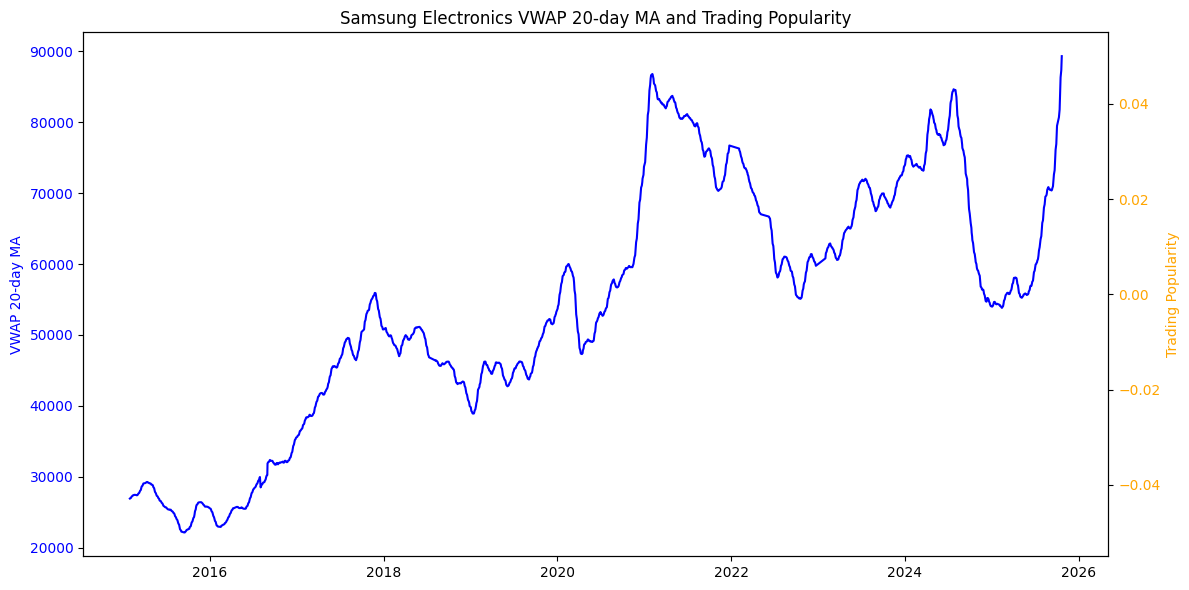

In [80]:
import matplotlib.pyplot as plt

df = tsobj[['vwap_ma20', 'trading_popular']].dropna()

fig, ax1 = plt.subplots(figsize=(12,6))

# Line plot for vwap_ma20
ax1.plot(df.index, df['vwap_ma20'], color='blue', label='VWAP 20-day MA')
ax1.set_ylabel('VWAP 20-day MA', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Bar plot for trading_popular on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(df.index, df['trading_popular'], color='orange', alpha=0.4, label='Trading Popularity')
ax2.set_ylabel('Trading Popularity', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Samsung Electronics VWAP 20-day MA and Trading Popularity')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Market Capitalization Over Time')

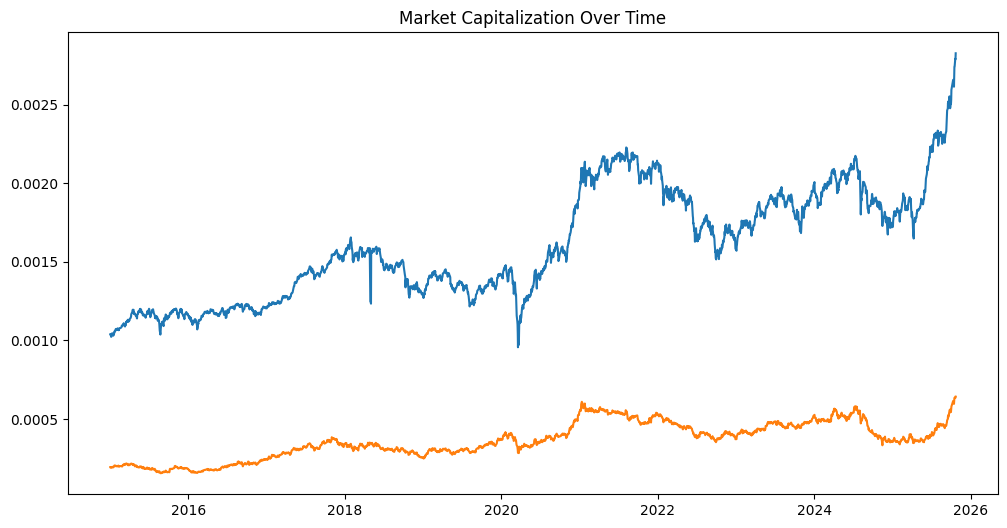

In [36]:
# plot ts_total_marketcap and ts_samsung_mktcap on the same plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(ts_total_marketcap.index, ts_total_marketcap.values / 1e12, label='Total Market Cap of All Agents (Trillions KRW)')
plt.plot(ts_samsung_mktcap.index, ts_samsung_mktcap['marketCap'].values / 1e12, label='Samsung Electronics Market Cap (Trillions KRW)')
plt.title('Market Capitalization Over Time')

In [51]:
# caculate volume statistics for agent_samsung
volume_stats = agent_samsung['agent'].ts_prices['volume'].describe()
# loop 20-day windows to calculate statistics
res_stats = []
window_size = 20
for start in range(0, len(agent_samsung['agent'].ts_prices) - window_size + 1):
    window = agent_samsung['agent'].ts_prices['volume'].iloc[start:start+window_size]
    start_date = agent_samsung['agent'].ts_prices['pricingDate'].iloc[start]
    end_date = agent_samsung['agent'].ts_prices['pricingDate'].iloc[start+window_size-1]
    # calculate trend as (last - first) / first
    trending = round((window.iloc[-1] - window.iloc[0]) / window.iloc[0],2)
    # count number which higher than standard deviation
    cnt_higher_std = (window > (window.mean() + window.std())).sum()
    res_stats.append({
        'start_date': start_date, 
        'end_date': end_date, 
        'mean': window.mean(), 
        'std': window.std(), 
        'trend': trending,
        'cnt_higher_std': cnt_higher_std
    })

dfstats = pd.DataFrame(res_stats)

In [54]:
dfstats.sort_values(by='cnt_higher_std', ascending=False)

,start_date,end_date,mean,std,trend,cnt_higher_std
860,2018-07-09,2018-08-03,8748925.25,2.025327e+06,-0.36,6
1139,2019-08-27,2019-09-25,11261635.50,3.826335e+06,-0.46,6
1136,2019-08-22,2019-09-20,11081927.50,4.027966e+06,0.92,6
1137,2019-08-23,2019-09-23,11057296.30,4.048862e+06,0.51,6
1138,2019-08-26,2019-09-24,11200025.00,3.871154e+06,-0.01,6
...,...,...,...,...,...,...
1756,2022-02-25,2022-03-28,14975809.95,6.295015e+06,-0.04,1
1757,2022-02-28,2022-03-29,15001695.95,6.288253e+06,-0.23,1
227,2015-12-01,2015-12-29,9778712.50,1.947190e+06,-0.01,1
228,2015-12-02,2015-12-30,9702395.00,1.896771e+06,-0.10,1


In [46]:
rec

0    7994600
Name: volume, dtype: int64

In [39]:
volume_ma_stats

count    2.630000e+03
mean     1.504434e+07
std      5.405127e+06
min      7.429815e+06
25%      1.111754e+07
50%      1.360142e+07
75%      1.768350e+07
max      4.012282e+07
Name: volume, dtype: float64

In [ ]:
print('t')

In [98]:
# pick sample agent
agent = agents[3]['agent']
agent.summary()

{'companyName': 'WiSoL CO.,LTD., tradingItemId: 112691987, companyId: 105853432',
 'industry': 'Symbol: A122990, Industry: Semiconductor and Other Electronic Component Manufacturing, Desc: Manufacturing, Desc2: Computer and Electronic Product Manufacturing',
 'price_head': "row count: 2652, columns: ['tradingItemId', 'pricingDate', 'priceOpen', 'priceHigh', 'priceLow', 'priceMid', 'priceClose', 'priceBid', 'priceAsk', 'volume', 'adjustmentFactor', 'VWAP']",
 'mktcap_head': "row count: 3949, columns: ['companyId', 'pricingDate', 'marketCap', 'TEV', 'sharesOutstanding']"}

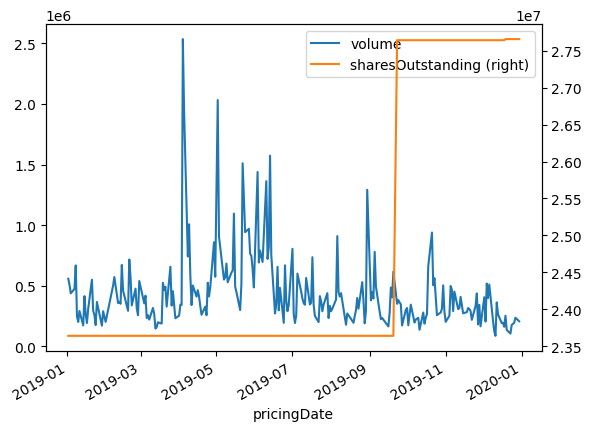

In [102]:
dfplot = agent.ts_prices[['pricingDate', 'volume', 'sharesOutstanding']]
dfplot = dfplot[(dfplot.pricingDate >= '2019') & (dfplot.pricingDate < '2020')].plot(x='pricingDate', y=['volume', 'sharesOutstanding'], secondary_y='sharesOutstanding')